In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"..\notebook\data\data.csv")

In [3]:
df.head(10)

,Unnamed: 0,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,...,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps,fuel_slope,fuel_bias,deg_slope,deg_bias,lag_slope_mean,lag_bias_mean
0,0,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,GIO,2.0,97.066,Qualifying,...,28.0,27.0,5.554,55,-0.109321,105.890630,0.056584,100.607381,NaN,NaN
1,1,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,RAI,2.0,97.555,Qualifying,...,12.0,43.0,5.554,55,0.005000,105.237000,-0.077195,106.352228,-0.010306,103.479805
2,2,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,GIO,1.0,97.066,Qualifying,...,1.0,27.0,5.554,55,-0.109321,105.890630,-0.365247,116.706700,NaN,NaN
3,3,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,1.0,97.555,Qualifying,...,1.0,10.0,5.554,55,0.005000,105.237000,0.216800,104.273100,-0.074224,110.489900
4,4,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,2.0,97.555,Qualifying,...,11.0,1.0,5.554,55,0.005000,105.237000,-0.077195,106.352228,NaN,NaN
5,5,Abu Dhabi Grand Prix,17,2020,AlphaTauri,HARD,GAS,2.0,96.242,Qualifying,...,11.0,45.0,5.554,55,0.014028,104.432250,-0.047074,105.046838,NaN,NaN
6,6,Abu Dhabi Grand Prix,17,2020,AlphaTauri,HARD,KVY,2.0,95.963,Qualifying,...,11.0,44.0,5.554,55,1.240400,100.773467,-0.063143,105.853639,-0.055108,105.450238
7,7,Abu Dhabi Grand Prix,17,2020,AlphaTauri,SOFT,GAS,1.0,96.242,Qualifying,...,1.0,10.0,5.554,55,0.014028,104.432250,0.113500,103.890500,NaN,NaN
8,8,Abu Dhabi Grand Prix,17,2020,AlphaTauri,SOFT,KVY,1.0,95.963,Qualifying,...,1.0,10.0,5.554,55,1.240400,100.773467,0.083200,104.213900,0.098350,104.052200
9,9,Abu Dhabi Grand Prix,17,2020,Ferrari,HARD,LEC,2.0,95.881,Qualifying,...,23.0,32.0,5.554,55,-0.110455,105.458030,0.011247,102.560839,NaN,NaN


## Column description

- RoundNumber = Round number in the season (first race of season == 1)
- Compound = CompoundTyre compound used
- Stint = Stint number (stint == period between a pit stop and the next one).
- Rainfall = Binary value indicating whether it rained or not
- GridPosition = Position in the starting grid
- raceStintsNums = Number of race stints performed by the driver
- TyreAge = Tyre age (in number of laps)
- StintLen = Stint length (in # of laps)
- CircuitLength = Length of circuit (in kilometers)
- designedLaps = Number of designated laps for the circuit
- fuel_slope = m in y=mx+B. Fuel slope (more laps -> less fuel -> better lap times -> fuel slope is negative). This is an averaged value throughout the race
- fuel_bias = B in y=mx+B.
- deg_slope = Degradation slope
- deg_bias = Degradation bias
- lag_slope_mean = Mean lag slope (never >1)



In [4]:
df = df.drop(["Unnamed: 0"], axis=1)

In [5]:
df.shape

(4611, 27)

## Things to Check

- missing values
- duplicates
- data type and null values
- number of unique values of each column
- stats of dataset
- categories of each column

In [6]:
df.isna().sum()

EventName                        0
RoundNumber                      0
eventYear                        0
Team                             0
Compound                         0
Driver                           0
Stint                            0
bestPreRaceTime                 51
bestLapTimeIsFrom               51
meanAirTemp                      0
meanTrackTemp                    0
meanHumid                        0
Rainfall                         0
GridPosition                     0
Position                         0
raceStintsNums                   0
TyreAge                        164
lapNumberAtBeginingOfStint       0
StintLen                         0
CircuitLength                    0
designedLaps                     0
fuel_slope                    1672
fuel_bias                     1672
deg_slope                      922
deg_bias                       922
lag_slope_mean                3117
lag_bias_mean                 3117
dtype: int64

In [7]:
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
categorial_inputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

numeric_na_features = [features for features in df.columns if df[features].dtype != "O" if df[features].isna().any()]
categorial_na_feature = [features for features in df.columns if df[features].dtype == "O" if df[features].isna().any()]

df[numeric_na_features] = numeric_imputer.fit_transform(df[numeric_na_features])
df[categorial_na_feature] = categorial_inputer.fit_transform(df[categorial_na_feature])


In [8]:
df.isna().sum()

EventName                     0
RoundNumber                   0
eventYear                     0
Team                          0
Compound                      0
Driver                        0
Stint                         0
bestPreRaceTime               0
bestLapTimeIsFrom             0
meanAirTemp                   0
meanTrackTemp                 0
meanHumid                     0
Rainfall                      0
GridPosition                  0
Position                      0
raceStintsNums                0
TyreAge                       0
lapNumberAtBeginingOfStint    0
StintLen                      0
CircuitLength                 0
designedLaps                  0
fuel_slope                    0
fuel_bias                     0
deg_slope                     0
deg_bias                      0
lag_slope_mean                0
lag_bias_mean                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4611 entries, 0 to 4610
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EventName                   4611 non-null   object 
 1   RoundNumber                 4611 non-null   int64  
 2   eventYear                   4611 non-null   int64  
 3   Team                        4611 non-null   object 
 4   Compound                    4611 non-null   object 
 5   Driver                      4611 non-null   object 
 6   Stint                       4611 non-null   float64
 7   bestPreRaceTime             4611 non-null   float64
 8   bestLapTimeIsFrom           4611 non-null   object 
 9   meanAirTemp                 4611 non-null   float64
 10  meanTrackTemp               4611 non-null   float64
 11  meanHumid                   4611 non-null   float64
 12  Rainfall                    4611 non-null   float64
 13  GridPosition                4611 

In [11]:
df.iloc[:,:16].describe()

,RoundNumber,eventYear,Stint,bestPreRaceTime,meanAirTemp,meanTrackTemp,meanHumid,Rainfall,GridPosition,Position,raceStintsNums
count,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000
mean,10.027109,2019.837345,2.080026,84.043715,23.285516,35.182670,52.977980,0.070865,10.127521,10.124485,2.080026
std,5.900101,1.326683,1.099741,12.451044,5.112471,9.593550,17.185723,0.239174,5.885882,5.580073,1.099741
min,1.000000,2018.000000,1.000000,53.377000,9.100000,13.872727,5.904762,0.000000,0.000000,1.000000,1.000000
25%,5.000000,2019.000000,1.000000,75.274000,20.494591,28.129825,39.279167,0.000000,5.000000,5.000000,1.000000
50%,10.000000,2020.000000,2.000000,82.146000,22.761538,34.600000,54.361538,0.000000,10.000000,10.000000,2.000000
75%,15.000000,2021.000000,3.000000,92.664000,26.849956,41.891422,64.331385,0.000000,15.000000,15.000000,3.000000
max,22.000000,2022.000000,8.000000,141.611000,37.016667,56.500000,96.666667,1.000000,20.000000,20.000000,8.000000


In [12]:
df.iloc[:,16:].describe()

,TyreAge,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps,fuel_slope,fuel_bias,deg_slope,deg_bias,lag_slope_mean,lag_bias_mean
count,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000
mean,2.639982,17.503795,20.453915,5.105498,61.301019,-0.088724,92.557848,-0.050195,91.340659,-0.034798,91.390772
std,4.101971,17.466539,12.923376,0.778559,8.822425,0.187657,10.013233,0.347318,17.601618,0.154325,9.716500
min,1.000000,0.000000,1.000000,3.337000,44.000000,-2.228067,67.187503,-11.417857,-23.877480,-8.118014,22.647291
25%,1.000000,1.000000,11.000000,4.574000,53.000000,-0.088724,87.560173,-0.055879,83.862833,-0.034798,91.390772
50%,1.000000,13.000000,20.000000,5.303000,58.000000,-0.088724,92.557848,-0.045361,91.340659,-0.034798,91.390772
75%,4.000000,31.000000,29.000000,5.793000,70.000000,-0.057815,97.720543,0.008454,97.842659,-0.034798,91.390772
max,57.000000,79.000000,68.000000,7.004000,87.000000,1.484409,135.657542,1.939496,545.279568,0.996135,533.647014


In [13]:
rainfall_before = df["Rainfall"].nunique()
print(f"Unique Values for Rainfall before: {rainfall_before}")

df.loc[df["Rainfall"] > 0 , "Rainfall"] = 1

rainfall_after = df["Rainfall"].nunique()
print(f"Unique Values for Rainfall after: {rainfall_after}")

Unique Values for Rainfall before: 150
Unique Values for Rainfall after: 2


In [14]:
numeric_features = [features for features in df.columns if df[features].dtype != "O"]
categorial_feature = [features for features in df.columns if df[features].dtype == "O"]

print(f"Number of numeric features: {len(numeric_features)}")
print(f"Number of categorial features: {len(categorial_feature)}")

Number of numeric features: 22
Number of categorial features: 5


In [15]:
print(numeric_features)
print(categorial_feature)

['RoundNumber', 'eventYear', 'Stint', 'bestPreRaceTime', 'meanAirTemp', 'meanTrackTemp', 'meanHumid', 'Rainfall', 'GridPosition', 'Position', 'raceStintsNums', 'TyreAge', 'lapNumberAtBeginingOfStint', 'StintLen', 'CircuitLength', 'designedLaps', 'fuel_slope', 'fuel_bias', 'deg_slope', 'deg_bias', 'lag_slope_mean', 'lag_bias_mean']
['EventName', 'Team', 'Compound', 'Driver', 'bestLapTimeIsFrom']


## Visualization



<Axes: >

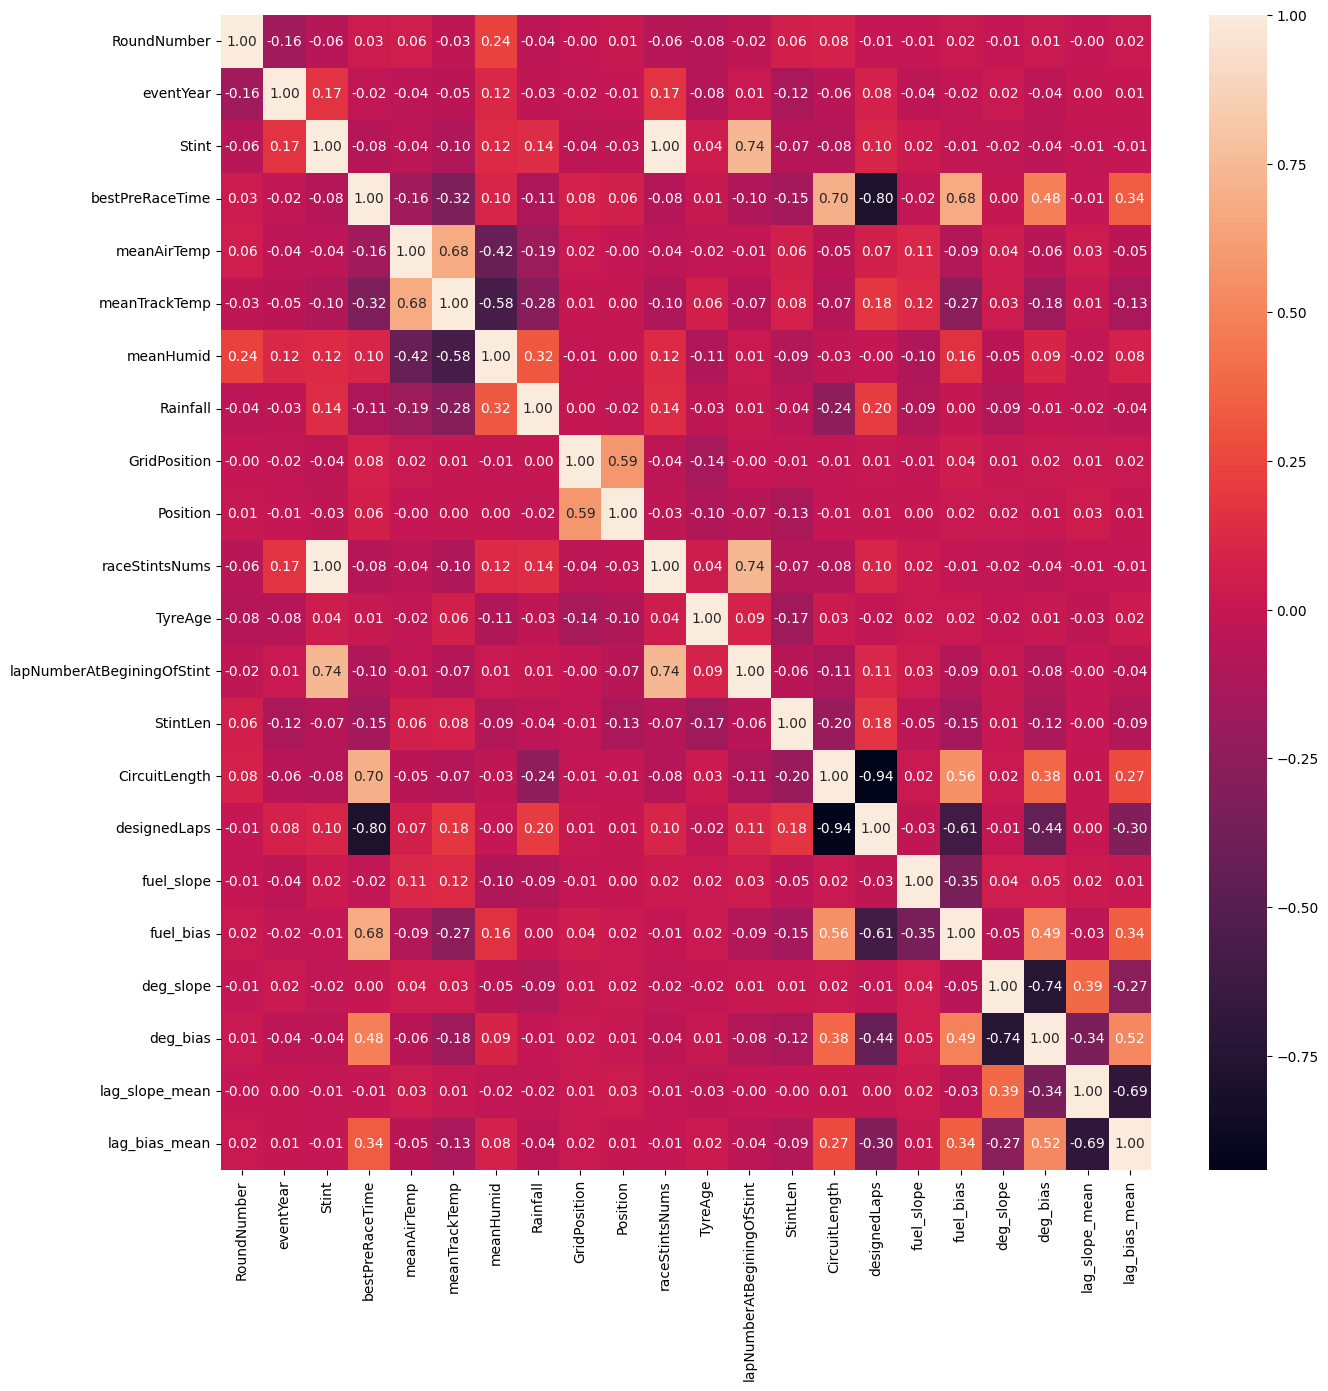

In [16]:
corr = df[numeric_features].corr()


fig, axs = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f")

<Axes: xlabel='Compound', ylabel='Count'>

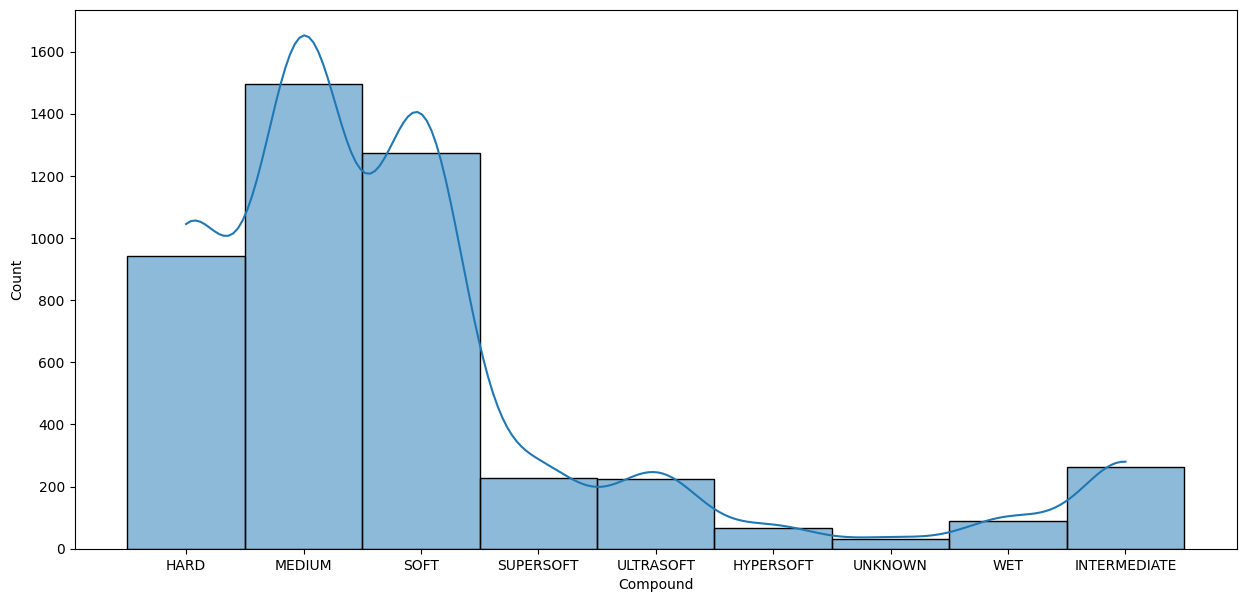

In [17]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.histplot(data=df, x="Compound", kde=True)

<Axes: xlabel='Stint', ylabel='count'>

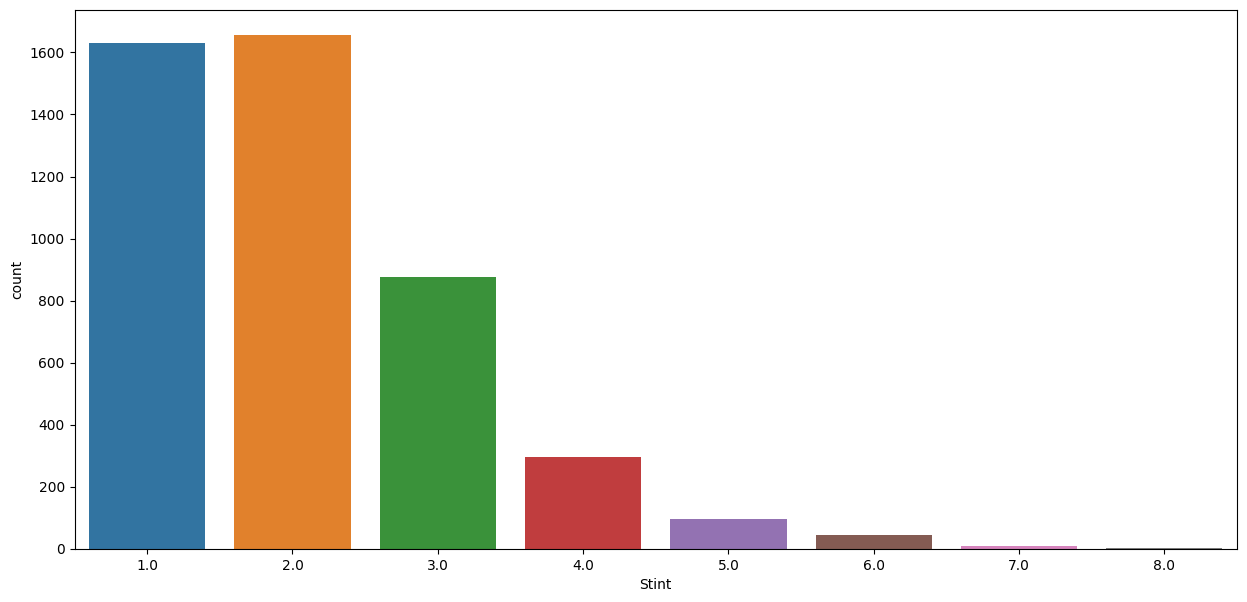

In [18]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Stint")

<Axes: xlabel='bestPreRaceTime', ylabel='Count'>

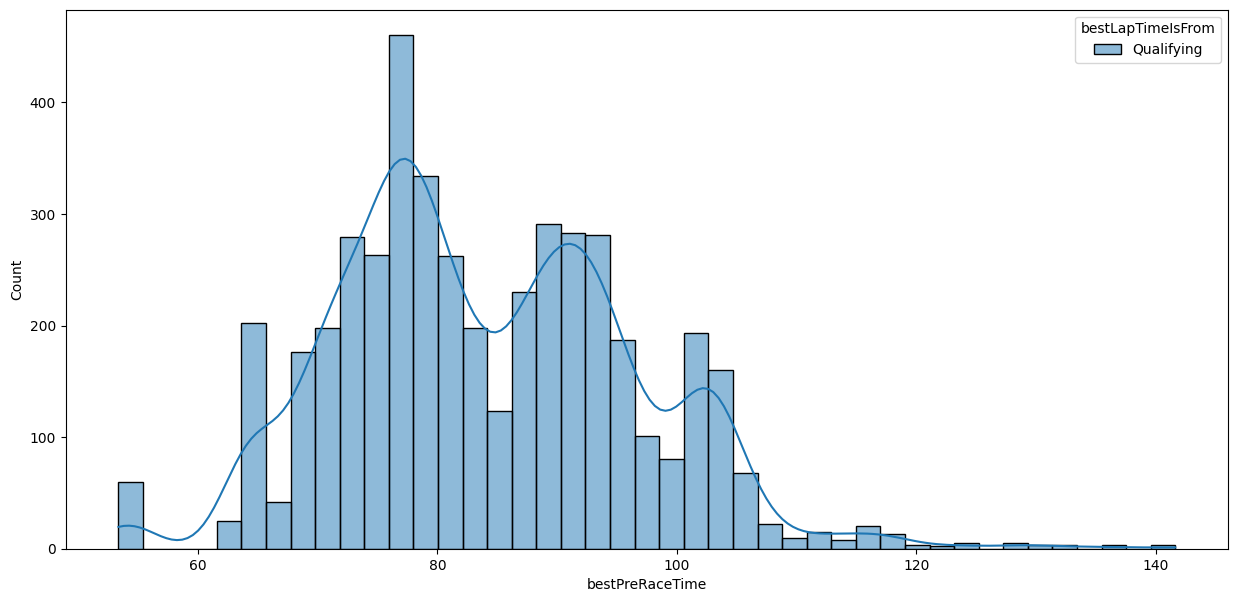

In [19]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.histplot(data=df, x="bestPreRaceTime", hue="bestLapTimeIsFrom", kde=True)

<Axes: xlabel='lapNumberAtBeginingOfStint', ylabel='Count'>

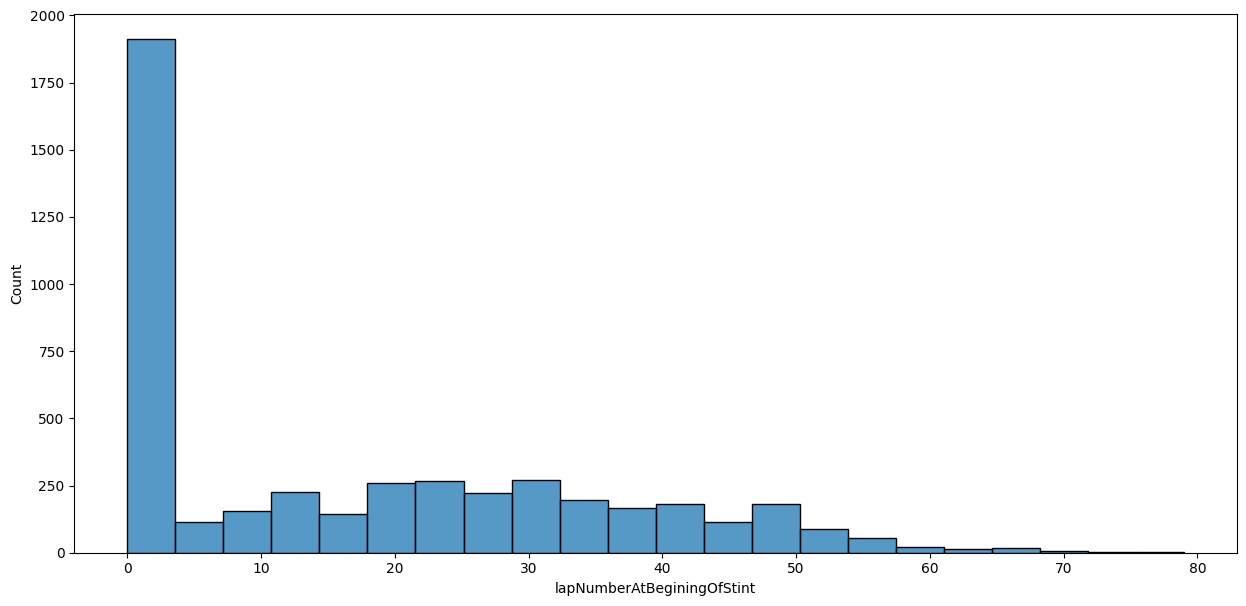

In [20]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.histplot(data=df, x="lapNumberAtBeginingOfStint")

<Axes: xlabel='bestPreRaceTime'>

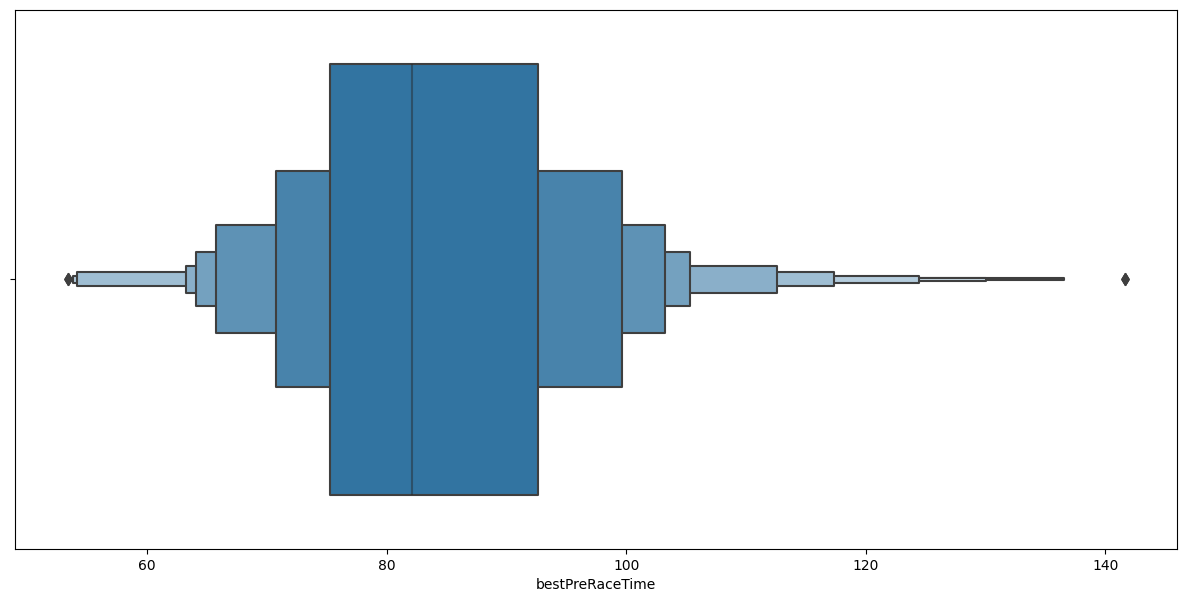

In [21]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.boxenplot(data=df, x="bestPreRaceTime")

<Axes: xlabel='StintLen'>

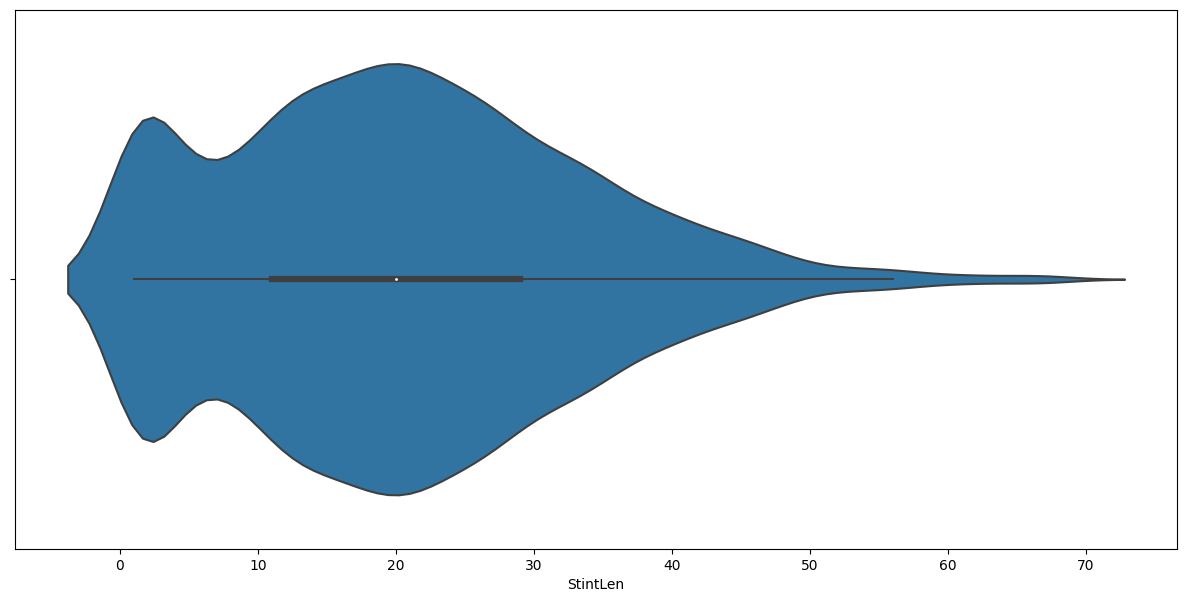

In [22]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.violinplot(data=df, x="StintLen")

<Axes: xlabel='Rainfall', ylabel='count'>

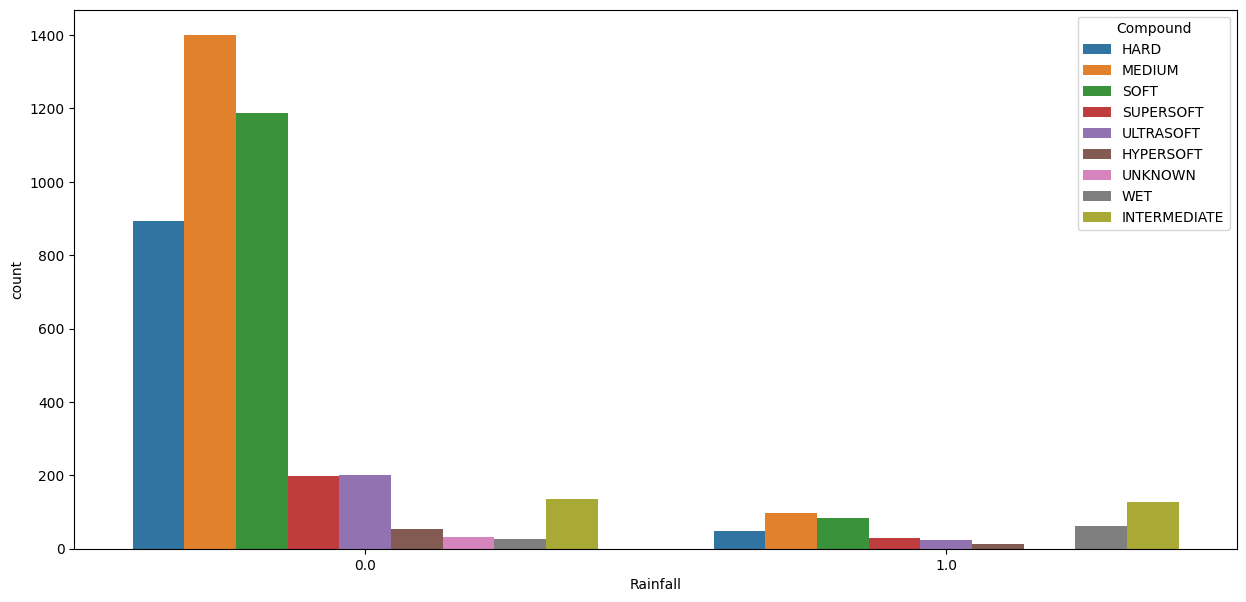

In [23]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Rainfall", hue="Compound")

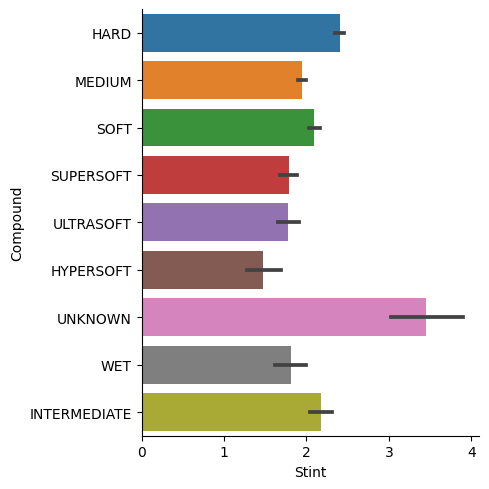

In [24]:
sns.catplot(data=df, x="Stint", y="Compound", kind="bar")

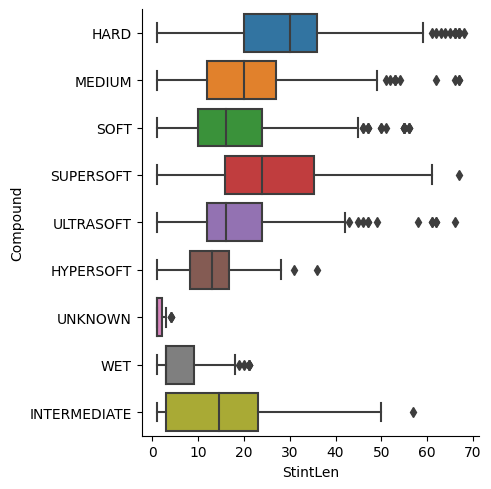

In [25]:
sns.catplot(data=df, x="StintLen", y="Compound", kind="box")

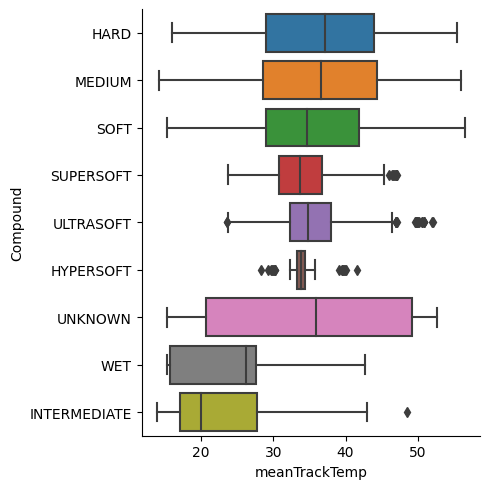

In [26]:
sns.catplot(data=df, x="meanTrackTemp", y="Compound", kind="box")

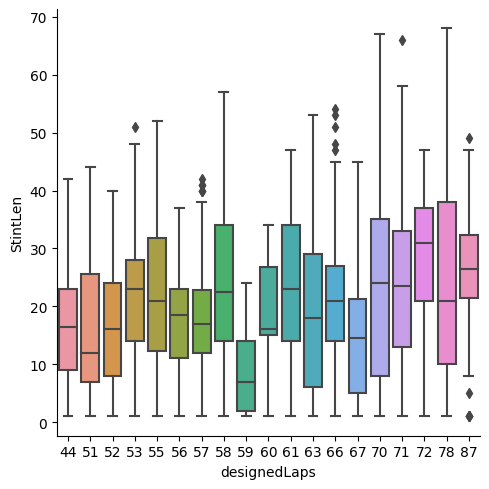

In [27]:
#fig, axs = plt.subplots(figsize=(15, 7))
sns.catplot(data=df, x="designedLaps", y="StintLen", kind="box")